# Download Datasets from Kaggle

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!rm -rf data

In [ ]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          32230        873  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           3842        111  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           5997        127  1.0              
mohithsairamreddy/salary-data 

In [ ]:
!kaggle datasets download -d nicholasrogelio/capstone-skincer-in

capstone-skincer-in.zip: Skipping, found more recently modified local copy (use --force to force download)


# Import Library

In [ ]:
! pip install tensorflow===2.9.0

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random
from glob import glob
import matplotlib.image as img
import zipfile
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.0


# Extract Zip File

In [ ]:
local_zip = 'capstone-skincer-in.zip'
target_extraction = '/content/data/'
file_check = "dataset"

try:
    if os.path.exists(os.path.join(target_extraction, file_check)):
        print("File Already Extracted")
    else:
        zip_ref = zipfile.ZipFile(local_zip, 'r')
        zip_ref.extractall(target_extraction)

except FileNotFoundError:
    print('Zip File Not Found!')

# Check our Dataset

In [ ]:
path = '/content/data/dataset/'
counter = 0
dir_names=['actinic_keratosis', 'basal_cell_carcinoma', 'benign_keratosis', 'dermatofibroma', 'melanoma', 'melanocytic_nevus', 'normal_skin', 'squamous_cell_carcinoma', 'vascular_lesions']

for file in (dir_names):
    dir = os.listdir(f"{path}/{file}")

    print(f"Data for {file} is {len(dir)}")

Data for actinic_keratosis is 300
Data for basal_cell_carcinoma is 300
Data for benign_keratosis is 300
Data for dermatofibroma is 141
Data for melanoma is 300
Data for melanocytic_nevus is 300
Data for normal_skin is 191
Data for squamous_cell_carcinoma is 300
Data for vascular_lesions is 179


# Dataset Augmentation

In [ ]:
!pip install augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dir_names=['actinic_keratosis', 'basal_cell_carcinoma', 'benign_keratosis', 'dermatofibroma', 'melanoma', 'melanocytic_nevus', 'normal_skin', 'squamous_cell_carcinoma', 'vascular_lesions']
import Augmentor
for i in dir_names:
    p = Augmentor.Pipeline(f"/content/data/dataset/{i}", output_directory=f'/content/data/final_dataset/{i}')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.5)
    p.flip_top_bottom(probability=0.5)
    p.zoom_random(probability=0.5, percentage_area=0.8)
    p.crop_random(probability=0.5, percentage_area=0.8)
    p.resize(probability=1.0, width=150, height=150)
    p.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.3)
    p.random_contrast(probability=0.5, min_factor=0.8, max_factor=1.2)
    p.sample(800)

Initialised with 300 image(s) found.
Output directory set to /content/data/final_dataset/actinic_keratosis.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F50B63CF010>: 100%|██████████| 800/800 [01:31<00:00,  8.74 Samples/s]


Initialised with 300 image(s) found.
Output directory set to /content/data/final_dataset/basal_cell_carcinoma.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F5149551A20>: 100%|██████████| 800/800 [01:54<00:00,  6.98 Samples/s]


Initialised with 300 image(s) found.
Output directory set to /content/data/final_dataset/benign_keratosis.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F50B61EEAA0>: 100%|██████████| 800/800 [00:51<00:00, 15.59 Samples/s]


Initialised with 141 image(s) found.
Output directory set to /content/data/final_dataset/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F50C765CAC0>: 100%|██████████| 800/800 [01:06<00:00, 11.98 Samples/s]


Initialised with 300 image(s) found.
Output directory set to /content/data/final_dataset/melanoma.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F50C75ECFD0>: 100%|██████████| 800/800 [01:19<00:00, 10.04 Samples/s]


Initialised with 300 image(s) found.
Output directory set to /content/data/final_dataset/melanocytic_nevus.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F50B6345FC0>: 100%|██████████| 800/800 [01:08<00:00, 11.73 Samples/s]


Initialised with 191 image(s) found.
Output directory set to /content/data/final_dataset/normal_skin.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F50B63668F0>: 100%|██████████| 800/800 [00:26<00:00, 30.60 Samples/s]


Initialised with 300 image(s) found.
Output directory set to /content/data/final_dataset/squamous_cell_carcinoma.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F51605E62C0>: 100%|██████████| 800/800 [01:00<00:00, 13.27 Samples/s]


Initialised with 179 image(s) found.
Output directory set to /content/data/final_dataset/vascular_lesions.

Processing <PIL.Image.Image image mode=RGB size=150x150 at 0x7F50B6344910>: 100%|██████████| 800/800 [00:58<00:00, 13.79 Samples/s]


# Check Total Data

In [ ]:
output_dir = pathlib.Path('/content/data/final_dataset/')
image_count_train = len(list(output_dir.glob('*/*.jpg')))
print(image_count_train)

7200


# Split Dataset Into Training and Validation

In [ ]:
training_main = pathlib.Path('/content/data/final_dataset')

In [ ]:
batch_size=64
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  training_main,
  shuffle=True,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(150, 150),
  batch_size=batch_size)

Found 7200 files belonging to 9 classes.
Using 5760 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  training_main,
  shuffle=True,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(150,150),
  batch_size=batch_size)

Found 7200 files belonging to 9 classes.
Using 1440 files for validation.


In [ ]:
validation_size = int(0.5 * val_ds.cardinality().numpy())
test_ds = val_ds.take(validation_size)
val_ds = val_ds.skip(validation_size)

In [ ]:
print("Training Set Size: %d" % train_ds.cardinality().numpy())
print("Validation Set Size: %d" % val_ds.cardinality().numpy())
print("Test Set Size: %d" % test_ds.cardinality().numpy())

Training Set Size: 90
Validation Set Size: 12
Test Set Size: 11


# Plot our Dataset (Each Class)

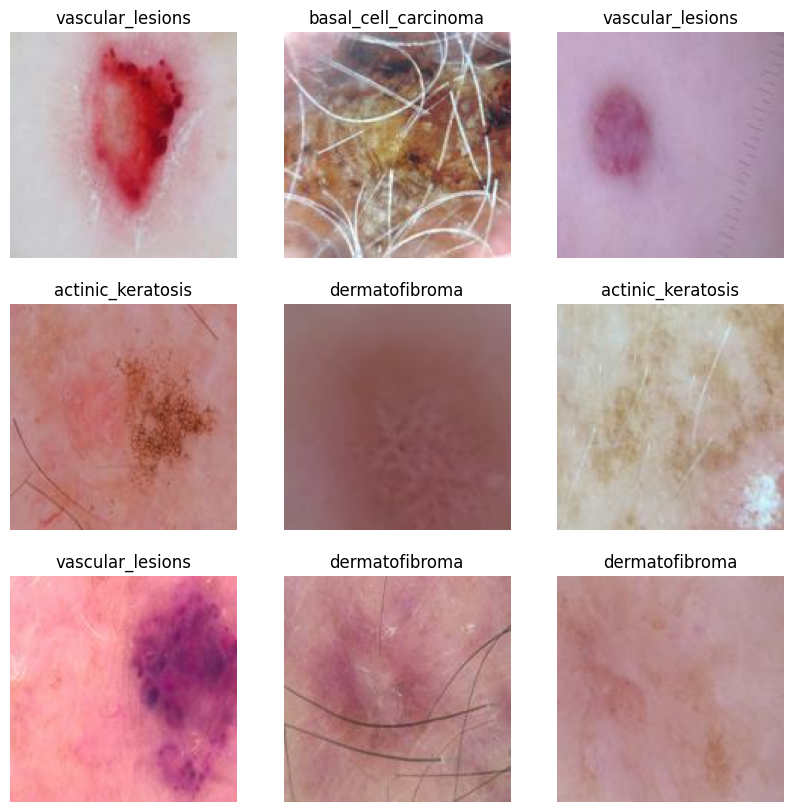

In [ ]:
plt.figure(figsize=(10, 10))
for image, label in val_ds.take(1):
    for i in range (9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(dir_names[label[i]])
        plt.axis("off")

# Parameter

In [ ]:
IMG_SIZE = (150,150)
IMG_SHAPE = IMG_SIZE + (3,)

# Architecture using Transfer Learning (EfficientNetB1)

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Adamax
base_model=tf.keras.applications.EfficientNetB1(include_top=False, weights="imagenet",input_shape=IMG_SHAPE, pooling='max')
x = base_model.output
x = tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(128, kernel_regularizer = regularizers.l2(l = 0.070),activity_regularizer=regularizers.l1(0.008),
                bias_regularizer=regularizers.l1(0.008), activation='relu')(x)
x = Dropout(rate=0.3, seed=123)(x)
output = Dense(9, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

In [ ]:
learning_rate = 0.001

model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adamax(learning_rate=learning_rate),
                  metrics=['accuracy'])

# Set Callbacks

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('val_accuracy') is not None and logs.get('val_accuracy') >= 0.92:
                print("\nReached 92% validation accuracy so cancelling training!")
                self.model.stop_training = True

callbacks = myCallback()

In [ ]:
initial_epochs = 30
history = model.fit(train_ds, validation_data=val_ds, validation_steps=int(0.2*len(val_ds)), epochs=initial_epochs, callbacks=[callbacks])

Epoch 1/30
 6/90 [=>............................] - ETA: 35s - loss: 21.1879 - accuracy: 0.2266

90/90 [==============================] - 54s 449ms/step - loss: 13.2251 - accuracy: 0.4991 - val_loss: 8.0520 - val_accuracy: 0.5859
Epoch 2/30
90/90 [==============================] - 39s 429ms/step - loss: 5.1266 - accuracy: 0.7464 - val_loss: 3.4780 - val_accuracy: 0.7031
Epoch 3/30
90/90 [==============================] - 38s 426ms/step - loss: 2.3165 - accuracy: 0.8344 - val_loss: 1.7851 - val_accuracy: 0.7969
Epoch 4/30
90/90 [==============================] - 38s 426ms/step - loss: 1.2297 - accuracy: 0.9005 - val_loss: 1.2006 - val_accuracy: 0.7734
Epoch 5/30
90/90 [==============================] - 38s 423ms/step - loss: 0.7767 - accuracy: 0.9406 - val_loss: 1.0373 - val_accuracy: 0.7578
Epoch 6/30
90/90 [==============================] - 39s 426ms/step - loss: 0.5705 - accuracy: 0.9682 - val_loss: 0.8985 - val_accuracy: 0.7969
Epoch 7/30
90/90 [==============================] - 38s 425ms/step - loss: 0.4779 - accuracy: 0.9740 - val_loss: 0.7369 - val_accuracy: 0.8750
Epoch 8/3

# Save Model

In [ ]:
model.save('./model_weights/new_skin_model(val_acc93).h5')

# Plot Training and Validation

Text(0.5, 1.0, 'Training vs Validation Loss')

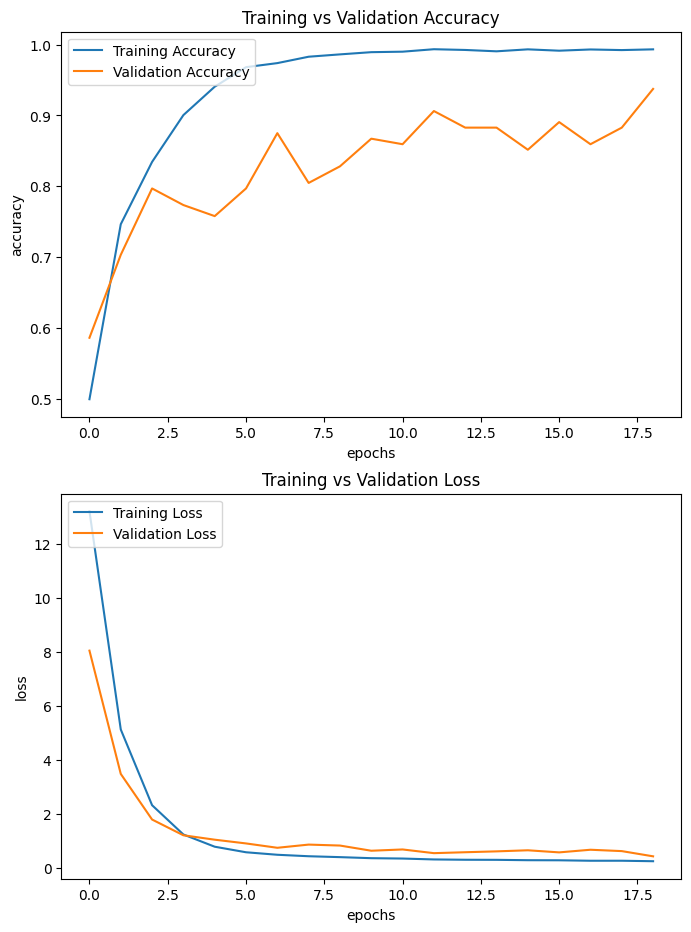

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 11))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.title('Training vs Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.title('Training vs Validation Loss')

# Evaluate Model

In [ ]:
model.evaluate(test_ds)

11/11 [==============================] - 1s 91ms/step - loss: 0.5511 - accuracy: 0.8849


[0.551147997379303, 0.8849431872367859]

# Load and Test Model

In [ ]:
print(train_ds.class_names)
label = train_ds.class_names

['actinic_keratosis', 'basal_cell_carcinoma', 'benign_keratosis', 'dermatofibroma', 'melanocytic_nevus', 'melanoma', 'normal_skin', 'squamous_cell_carcinoma', 'vascular_lesions']


In [ ]:
from tensorflow.keras.models import load_model
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
model = load_model('/content/new_skin_model.h5')

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 150, 150, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 150, 150, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                            

In [ ]:
model.evaluate(test_ds)

11/11 [==============================] - 14s 91ms/step - loss: 0.5860 - accuracy: 0.8736


[0.5860356688499451, 0.8735795617103577]

In [ ]:
uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))

  x=img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  result = classes[0]
  for count, x in enumerate(result):
    print(f'{label[count]}: {round(result[count] * 100)}% accuracy')

  predicted_label = np.argmax(result)
  max_label = np.max(result)
  if max_label > 0.5:
    print(f'\nYou Are Diagnosed With {label[predicted_label]} With {round(result[predicted_label] * 100)}% accuracy')
  else:
    print('\nYou Have Normal Skin!')


  name = list(uploaded.keys())

  !rm '{name[0]}'

Saving ISIC_0072556.jpg to ISIC_0072556.jpg
1/1 [==============================] - 12s 12s/step
actinic_keratosis: 8% accuracy
basal_cell_carcinoma: 3% accuracy
benign_keratosis: 21% accuracy
dermatofibroma: 5% accuracy
melanocytic_nevus: 20% accuracy
melanoma: 21% accuracy
normal_skin: 4% accuracy
squamous_cell_carcinoma: 4% accuracy
vascular_lesions: 13% accuracy

You Have Normal Skin!


#Deploy to TFLite

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

In [ ]:
tflite_name = 'tf_lite_model.tflite'

with open(tflite_name, 'wb') as f:
  f.write(tflite_model)